In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
customers = pd.read_csv('datasets/Customers.csv')
print("Shape of customers dataframe: ", customers.shape)
customers.head() 
#there are 4 different regions: 'South America', 'Asia', 'North America', 'Europe'


Shape of customers dataframe:  (200, 4)


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


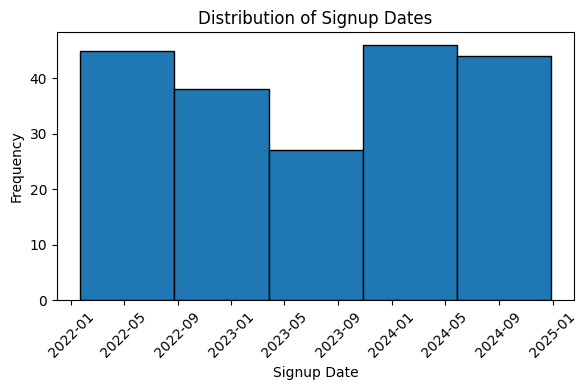

In [26]:
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Plot distribution of signup dates
plt.figure(figsize=(6, 4))
plt.hist(customers['SignupDate'], bins=5, edgecolor='black')
plt.title("Distribution of Signup Dates")
plt.xlabel("Signup Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
products = pd.read_csv('datasets/Products.csv')
print("shape of products dataframe: ", products.shape)
products.head() ##there are 100 instances 
#there are 66 different products
#4 category: 'Books', 'Electronics', 'Home Decor', 'Clothing'

shape of products dataframe:  (100, 4)


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


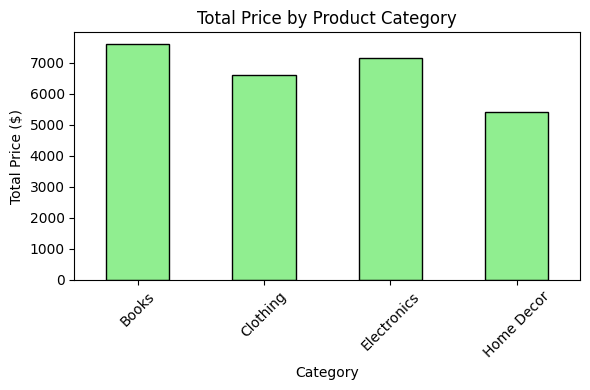

In [33]:
#Category-wise price distribution
plt.figure(figsize=(6, 4))
products.groupby('Category')['Price'].sum().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Total Price by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

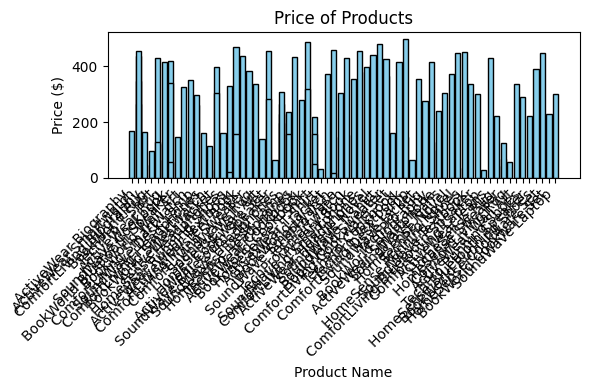

In [29]:
#Distribution of product prices
plt.figure(figsize=(6, 4))
plt.bar(products['ProductName'], products['Price'], color='skyblue', edgecolor='black')
plt.title("Price of Products")
plt.xlabel("Product Name")
plt.ylabel("Price ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
transactions = pd.read_csv('datasets/Transactions.csv')
print("Shape of transactions dataframe: ", transactions.shape)
transactions.head() #this paticular dataframe is the intersection of customers and products

Shape of transactions dataframe:  (1000, 7)


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
#this is a combined dataframe of all 3 csv
merged_df = transactions.merge(customers, on='CustomerID', how='left')
merged_df = merged_df.merge(products, on='ProductID', how='left')

In [6]:
merged_df.drop(['Price_x', 'Price_y'], inplace=True, axis=1)

In [7]:
merged_df.head() #this has combined information

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


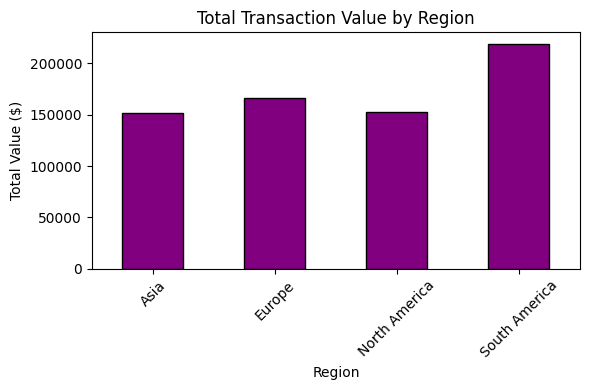

In [37]:
plt.figure(figsize=(6, 4))
merged_df.groupby('Region')['TotalValue'].sum().plot(kind='bar', color='purple', edgecolor='black')
plt.title("Total Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Total Value ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
#this dataframe has information about region and total value of the region
region_revenue = merged_df.groupby('Region')['TotalValue'].sum().reset_index()
region_revenue.head(5)

,Region,TotalValue
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56



1. South America leads with 31.61% of the total sales revenue, followed by Europe at 23.96%, while North America and Asia contribute similarly with 21.96% and 21.94%, respectively, highlighting South America's larger contribution.

C:\Users\mahes\AppData\Local\Temp\ipykernel_8156\544462495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='TotalValue', data=region_revenue, palette='viridis')


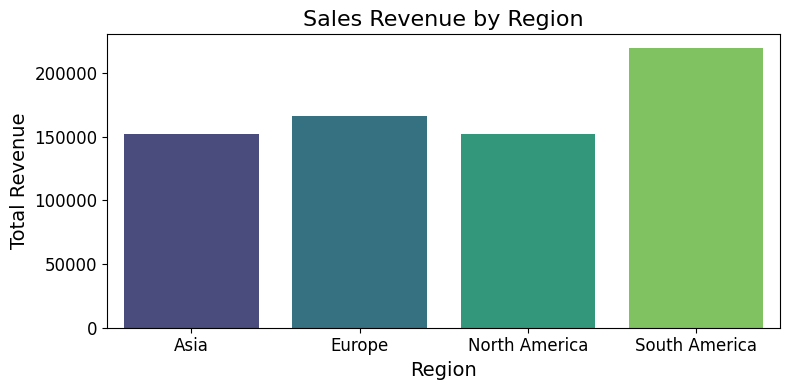

In [9]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Region', y='TotalValue', data=region_revenue, palette='viridis')
plt.title('Sales Revenue by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()



2. This curve illustrates the relationship between value generation across various categories (Books, Electronics, Clothing, and Home Decor). The insights are as follows:

a. Books: This category demonstrates both higher sales volume and revenue, making it the most significant contributor overall. \
b. Home Decor: Although the quantity sold is substantial, the revenue generated is relatively low, suggesting lower price points or margins in this category.\
d. Clothing: A smaller sales quantity is associated with higher revenue, indicating higher unit prices or profitability.\
e. Electronics: This category generates higher revenue compared to Home decor for lesser quantity.

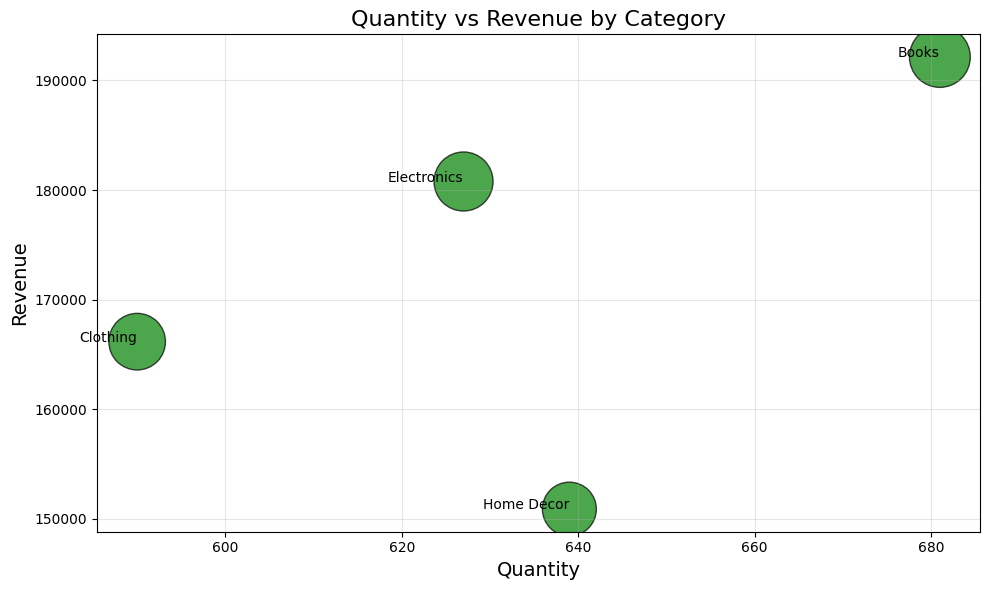

In [10]:
# Aggregating data for Quantity, Category, and Revenue
category_quantity_revenue = merged_df.groupby('Category').agg({'Quantity': 'sum', 'TotalValue': 'sum'}).reset_index()
# Using a scatter plot for better visualization of the relationship between Quantity and Revenue
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with quantity on x-axis and revenue on y-axis
scatter = ax.scatter(
    category_quantity_revenue['Quantity'],
    category_quantity_revenue['TotalValue'],
    s=category_quantity_revenue['TotalValue'] / 100,  # Scale point size by revenue
    c='green',
    alpha=0.7,
    edgecolors='black'
)

# Adding labels and title
for i, category in enumerate(category_quantity_revenue['Category']):
    ax.text(
        category_quantity_revenue['Quantity'][i],
        category_quantity_revenue['TotalValue'][i],
        category,
        fontsize=10,
        ha='right'
    )

ax.set_title('Quantity vs Revenue by Category', fontsize=16)
ax.set_xlabel('Quantity', fontsize=14)
ax.set_ylabel('Revenue', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


3. The time difference between the signup date and first transaction date is a key factor for customer retention, which is analysed here

In [57]:
transactions = transactions.merge(customers, on='CustomerID', how='left')
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName_x,Region_x,SignupDate_x,CustomerName_y,Region_y,SignupDate_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,Timothy Perez,Europe,2022-03-15


In [50]:


# Convert dates to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['SignupDate'] = pd.to_datetime(transactions['SignupDate'])

# Function to calculate time difference for a specific CustomerID
def calculate_time_difference(customer_id):
    customer_data = transactions[transactions['CustomerID'] == customer_id]
    if not customer_data.empty:
        signup_date = customer_data['SignupDate'].iloc[0]
        first_transaction_date = customer_data['TransactionDate'].min()
        time_difference = first_transaction_date - signup_date
        if int(time_difference.days) < 0:
            print('negative time difference ', customer_id, first_transaction_date, signup_date)
            return -1
        return int(time_difference.days)
    else:
        return -1



ls = []
for c in customers['CustomerID']:
    ls.append(calculate_time_difference(c))


negative time difference  C0003 2024-02-18 02:50:37 2024-03-07 00:00:00
negative time difference  C0012 2024-05-12 12:53:40 2024-08-07 00:00:00
negative time difference  C0013 2024-02-24 20:08:07 2024-05-19 00:00:00
negative time difference  C0014 2024-01-17 18:31:55 2024-06-22 00:00:00
negative time difference  C0018 2024-02-17 18:50:52 2024-09-21 00:00:00
negative time difference  C0020 2024-01-30 00:57:29 2024-06-11 00:00:00
negative time difference  C0026 2024-03-20 10:30:55 2024-05-03 00:00:00
negative time difference  C0028 2024-01-23 07:39:44 2024-06-29 00:00:00
negative time difference  C0030 2024-01-28 04:10:05 2024-01-30 00:00:00
negative time difference  C0031 2024-03-06 01:55:48 2024-04-11 00:00:00
negative time difference  C0032 2024-02-24 09:30:35 2024-04-17 00:00:00
negative time difference  C0033 2024-07-05 23:41:15 2024-08-04 00:00:00
negative time difference  C0035 2024-01-17 12:40:30 2024-10-01 00:00:00
negative time difference  C0036 2024-01-23 12:53:51 2024-07-06 0

Few customers have a negative difference period, which means the customer has made a transaction before signup, assuming its not a valid data point mean is calculated only on valid points.


In [53]:
count = mean = 0
for i in ls:
    if not int(i)<0:
        mean += i
        count += 1
print('Average time between signup date and first transaction: ',mean/count)

403.02919708029196


In [54]:
print('Valid datapoints: ', count/200) ##200 is the total count of customers

137

4. Customer retaintion rate

In [12]:
repeat_customers = merged_df.groupby('CustomerID')['TransactionID'].count()
repeat_customer_rate = (repeat_customers > 1).mean() * 100

# Repeat customer rate by region
repeat_customers_by_region = merged_df.groupby(['Region', 'CustomerID'])['TransactionID'].count().reset_index()
repeat_customers_by_region = repeat_customers_by_region.groupby('Region').apply(lambda x: (x['TransactionID'] > 1).mean() * 100)



In [14]:
print("Repeat customers: ", repeat_customers_by_region)

Repeat customers:  Region
Asia             90.909091
Europe           96.000000
North America    93.478261
South America    94.915254
dtype: float64


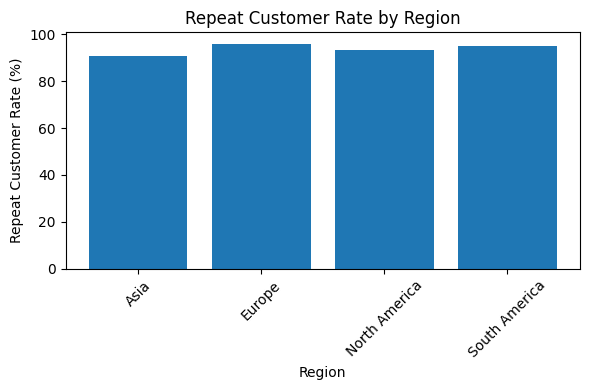

In [22]:
plt.figure(figsize=(6, 4))
plt.bar(repeat_customers_by_region.index, repeat_customers_by_region.values)
plt.title("Repeat Customer Rate by Region")
plt.ylabel("Repeat Customer Rate (%)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


          Region  Customer Lifetime Value (CLV)
0           Asia                    3379.443778
1         Europe                    3325.092600
2  North America                    3311.160870
3  South America                    3717.840000


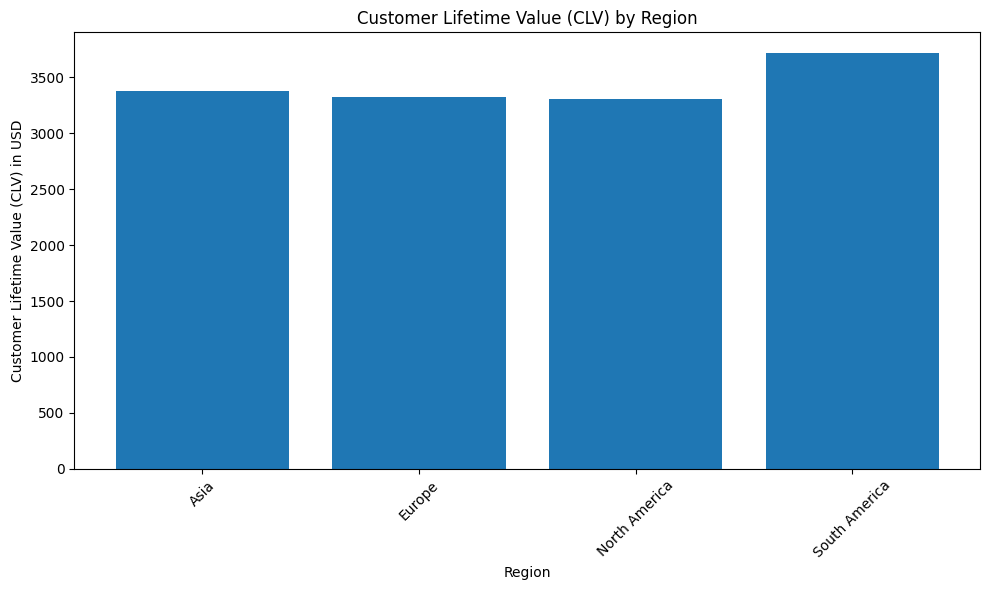

In [ ]:
# total revenue and number of customers per region
region_revenue = merged_df.groupby('Region')['TotalValue'].sum()
region_customers = customers.groupby('Region')['CustomerID'].nunique()

# CLV (Customer Lifetime Value) by region
region_clv = (region_revenue / region_customers).reset_index()
region_clv.columns = ['Region', 'Customer Lifetime Value (CLV)']

# Display the results
print(region_clv)

plt.figure(figsize=(10, 6))
plt.bar(region_clv['Region'], region_clv['Customer Lifetime Value (CLV)'])
plt.title('Customer Lifetime Value (CLV) by Region')
plt.xlabel('Region')
plt.ylabel('Customer Lifetime Value (CLV) in USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
